In [586]:
## Code Header
## Notebook Name: FIFA Wage Prediction Analysis
## Objective: To understand how player attributes in association football lead to their weekly wages.
## Start Date: 8th April, 2020
## Data Sources
    # Source: FIFA 18 Complete Player Dataset - https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset
## Author(s): Soumya Halder
## Edits to be made
## Structure of the analysis
    # Data Input: Read all the columns in the right format
    # Data cleaning and preparation for the analysis
    # EDA - Glean insights which might help design decisions
    # SciKit Learn
        # Linear Regression
        # Trees
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import textstat
import math
import warnings
warnings.filterwarnings('ignore')

In [587]:
# Importing datasets which contains information about players attributes, personal data and position

attribute = pd.read_csv('Project Data/PlayerAttributeData.csv')
personal = pd.read_csv('Project Data/PlayerPersonalData.csv')
position = pd.read_csv('Project Data/PlayerPlayingPositionData.csv');

In [588]:
attribute.head()

,id_attribute,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11


In [589]:
# Correcting datatypes for attribute df
attribute.dtypes;
attribute = attribute.convert_objects(convert_numeric = True);

In [590]:
personal.head()

,id_personal,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [591]:
personal.dtypes;

In [592]:
position.head()

,id_position,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [593]:
position.dtypes;

In [594]:
# Joining 2 datasets at a time - personal & position
fifa_pp = pd.merge(personal, position, left_on = ['id_personal'], right_on = ['id_position'], how = 'inner')
fifa_pp.shape

(17981, 43)

In [595]:
# Joining the above result with the 3rd table attribute
fifa_ppa = pd.merge(fifa_pp, attribute, left_on = ['id_personal'], right_on = ['id_attribute'], how = 'inner')
fifa_ppa.shape

(17981, 79)

In [596]:
# Split preferred postion column to get the primary playing position for a player
fifa_splitcol = fifa_ppa['Preferred Positions'].str.split(' ', n = 2, expand=True)

# Adding the column to main dataset
fifa_ppa['Position'] = fifa_splitcol[0]

# Dropping original column from main dataset
fifa_ppa.drop(columns = ['Preferred Positions'], inplace = True) 

In [597]:
# Getting all unique values from the new column
fifa_ppa['Position'].unique()

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

In [598]:
# Combining all positions into 4 major categories - goalkeeper, defender, midfielder, attacker
def player_pos (row):
    if row['Position'] == 'GK':
        return 'GK'
    if row['Position'] == 'CB' or row['Position'] == 'LB' or row['Position'] == 'RB' or row['Position'] == 'RWB' or row['Position'] == 'LWB':
        return 'DF'
    if row['Position'] == 'CM' or row['Position'] == 'RM' or row['Position'] == 'LM' or row['Position'] == 'CAM' or row['Position'] == 'CDM':
        return 'MF'
    return 'AT'

fifa_ppa['Playing Position'] = fifa_ppa.apply(lambda row: player_pos(row), axis=1)

In [599]:
# Converting the Wage & Value column into numeric data type
def convert_into_currency (value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in value:
        out = float(out.replace('K', ''))*1000
    return float(out)

fifa_ppa['Value'] = fifa_ppa['Value'].apply(lambda x: convert_into_currency(x))
fifa_ppa['Wage'] = fifa_ppa['Wage'].apply(lambda x: convert_into_currency(x))

In [600]:
# Length of the dataset
print('Length of DF dataset with NaN:', len(fifa_ppa))

Length of DF dataset with NaN: 17981


In [601]:
fifa_ppa.groupby('Playing Position').agg({'id_personal' : ['count']})

,id_personal
,count
Playing Position,
AT,3338
DF,5440
GK,2029
MF,7174


In [602]:
# Creating subsets of the data by playing positions
fifa_gk = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'GK']
fifa_df = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'DF']
fifa_mf = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'MF']
fifa_at = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'AT']

In [603]:
fifa_gk.isna().sum();
fifa_df.isna().sum();
fifa_mf.isna().sum();
fifa_at.isna().sum();

In [604]:
# Removing addtional columns and drop rows with NaN values
fifa18 = fifa_ppa.drop(['ID_x', 'Photo', 'Flag', 'Club Logo', 'Special', 'id_position', 'ID_y', 'id_attribute', 'GK diving', 'GK handling', 'GK kicking',
                        'GK positioning', 'GK reflexes', 'ID'], axis = 1)

fifa18.dropna(inplace = True)
fifa18.reset_index()
print('Length of DF dataset after removing NaN:', len(fifa18))

Length of DF dataset after removing NaN: 15148


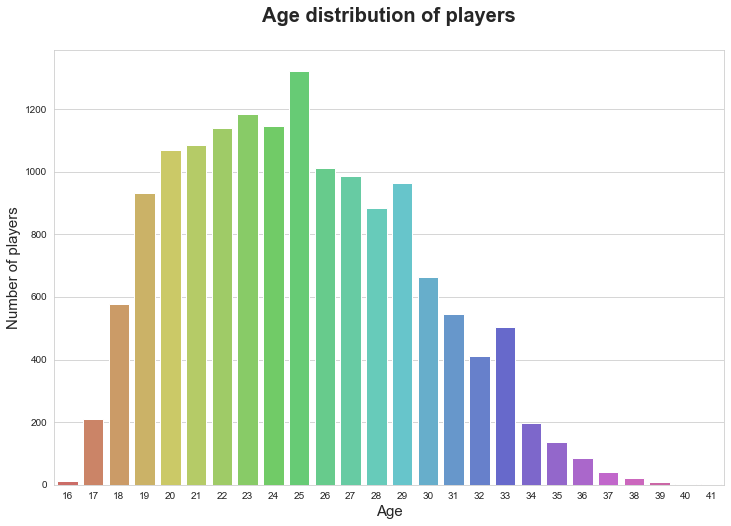

In [605]:
# Distribution of age
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age distribution of players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.countplot(x = 'Age', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of players', fontsize = 15)
plt.show();

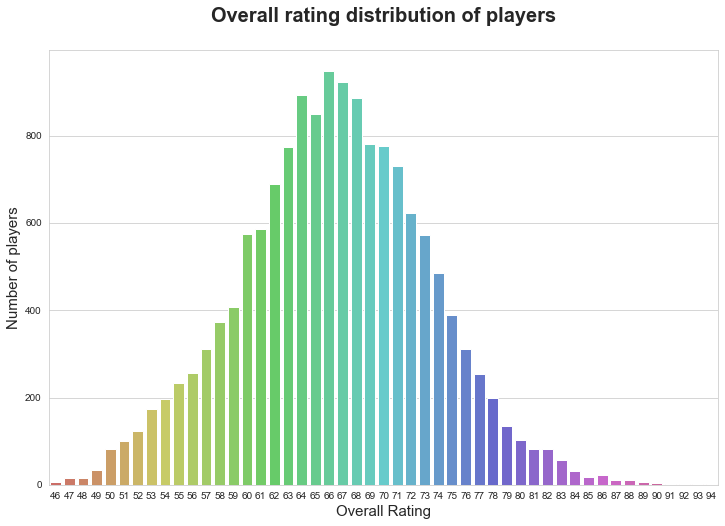

In [606]:
# Distribution of Overall Rating
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Overall rating distribution of players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.countplot(x = 'Overall', data = fifa18, palette = 'hls');
plt.xlabel('Overall Rating', fontsize = 15)
plt.ylabel('Number of players', fontsize = 15)
plt.show();

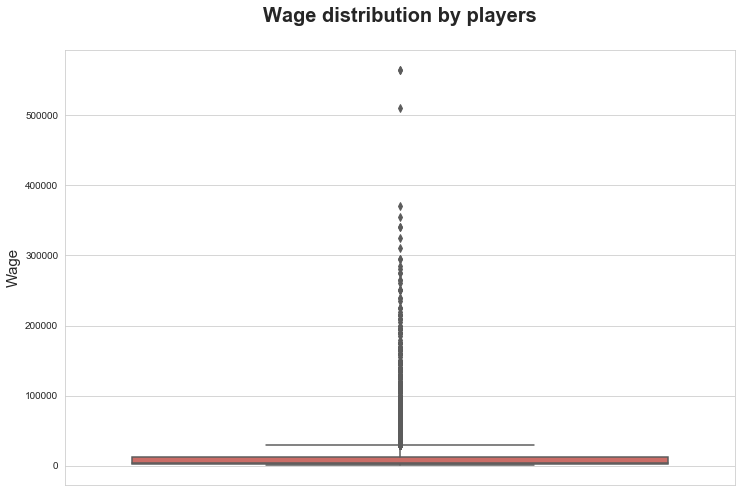

In [607]:
# Distribution of Overall Rating
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Wage distribution by players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.boxplot(x = 'Wage', data = fifa18, palette = 'hls', orient = 'v');
plt.ylabel('Wage', fontsize = 15)
plt.show();

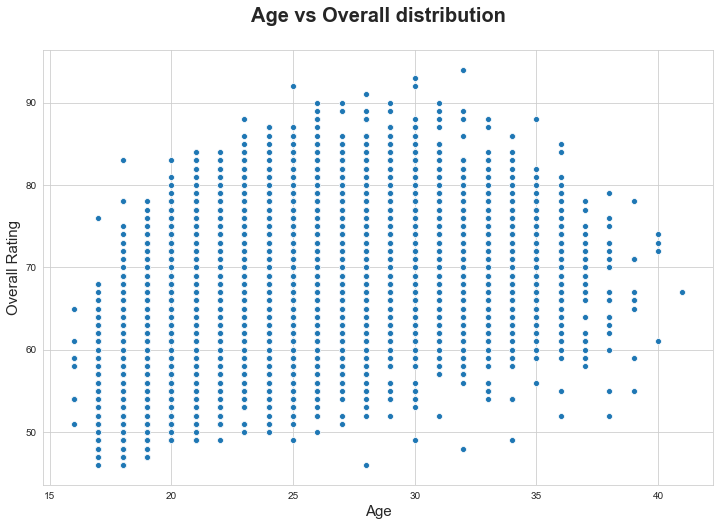

In [608]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age vs Overall distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Age', y = 'Overall', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Overall Rating', fontsize = 15)
plt.show();

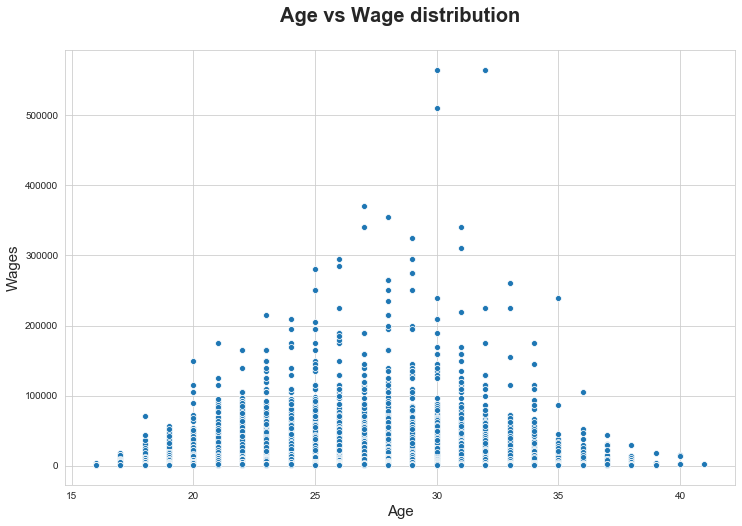

In [609]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age vs Wage distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Age', y = 'Wage', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Wages', fontsize = 15)
plt.show();

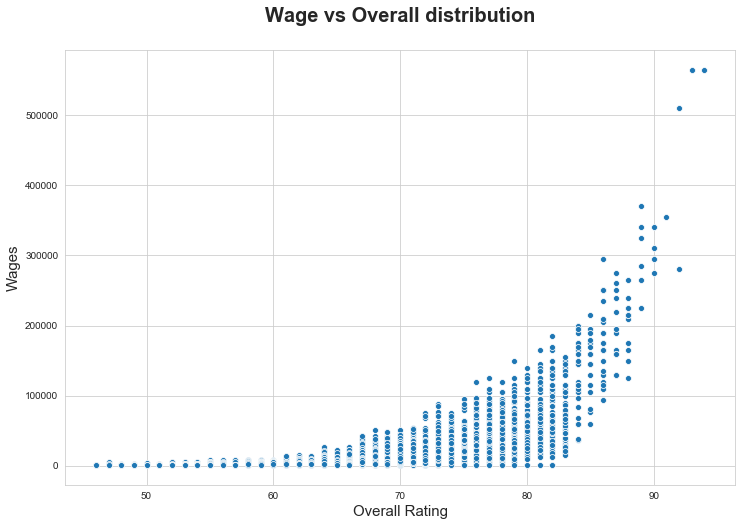

In [610]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Wage vs Overall distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Overall', y = 'Wage', data = fifa18, palette = 'hls');
plt.xlabel('Overall Rating', fontsize = 15)
plt.ylabel('Wages', fontsize = 15)
plt.show();

In [611]:
# Teams spending most on player wages
club_wage = fifa18.groupby('Club').agg({'Wage' : ['sum', 'mean', 'min', 'max', 'std', 'count']}).reset_index()
club_wage.columns = ['Club', 'Total_Wage', 'Average_Wage', 'Minimum Wage', 'Maximum Wage', 'Std Dev', 'Player Count']
club_wage = club_wage.round({'Total_Wage' : 0, 'Average_Wage' : 0, 'Std Dev' : 2})
club_wage_tw = club_wage.sort_values(by = ['Total_Wage'], ascending = False).reset_index().drop(['index'], axis = 1).head(10)
club_wage_tw

,Club,Total_Wage,Average_Wage,Minimum Wage,Maximum Wage,Std Dev,Player Count
0,FC Barcelona,4465000.0,202955.0,120000.0,565000.0,118448.89,22
1,Real Madrid CF,4456000.0,193739.0,22000.0,565000.0,132784.59,23
2,FC Bayern Munich,2969000.0,129087.0,7000.0,355000.0,93907.07,23
3,Manchester City,2950000.0,98333.0,5000.0,325000.0,85771.68,30
4,Juventus,2931000.0,127435.0,37000.0,275000.0,58542.78,23
5,Arsenal,2824000.0,91097.0,6000.0,265000.0,70181.36,31
6,Manchester United,2821000.0,112840.0,10000.0,240000.0,66385.04,25
7,Chelsea,2766000.0,125727.0,4000.0,295000.0,82604.15,22
8,Everton,2320000.0,77333.0,6000.0,130000.0,41359.93,30
9,Liverpool,2076000.0,90261.0,11000.0,205000.0,54631.17,23


In [612]:
# Teams ranked on basis of highest average wages
club_wage_aw = club_wage.sort_values(by = ['Average_Wage'], ascending = False).reset_index().drop(['index'], axis = 1).head(10)
club_wage_aw

,Club,Total_Wage,Average_Wage,Minimum Wage,Maximum Wage,Std Dev,Player Count
0,FC Barcelona,4465000.0,202955.0,120000.0,565000.0,118448.89,22
1,Real Madrid CF,4456000.0,193739.0,22000.0,565000.0,132784.59,23
2,FC Bayern Munich,2969000.0,129087.0,7000.0,355000.0,93907.07,23
3,Juventus,2931000.0,127435.0,37000.0,275000.0,58542.78,23
4,Chelsea,2766000.0,125727.0,4000.0,295000.0,82604.15,22
5,Manchester United,2821000.0,112840.0,10000.0,240000.0,66385.04,25
6,Manchester City,2950000.0,98333.0,5000.0,325000.0,85771.68,30
7,Arsenal,2824000.0,91097.0,6000.0,265000.0,70181.36,31
8,Liverpool,2076000.0,90261.0,11000.0,205000.0,54631.17,23
9,Paris Saint-Germain,2067000.0,82680.0,6000.0,280000.0,63411.83,25


In [613]:
# Wage distribution by position
club_wage_pp = fifa18.groupby(['Playing Position']).agg({'Wage' : ['mean', 'sum', 'min', 'max', 'count']}).reset_index()
club_wage_pp.columns = ['Playing Position', 'Average_Wage', 'Total_Wage', 'Minimum Wage', 'Maximum Wage', 'Player Count']
club_wage_pp = club_wage_pp.round({'Total_Wage' : 0, 'Average_Wage' : 0})
club_wage_pp.sort_values(by = ['Average_Wage'], ascending = False).reset_index().drop(['index'], axis = 1).head(10)

,Playing Position,Average_Wage,Total_Wage,Minimum Wage,Maximum Wage,Player Count
0,AT,14033.0,44654000.0,1000.0,565000.0,3182
1,MF,11943.0,81018000.0,1000.0,340000.0,6784
2,DF,11062.0,57325000.0,1000.0,310000.0,5182


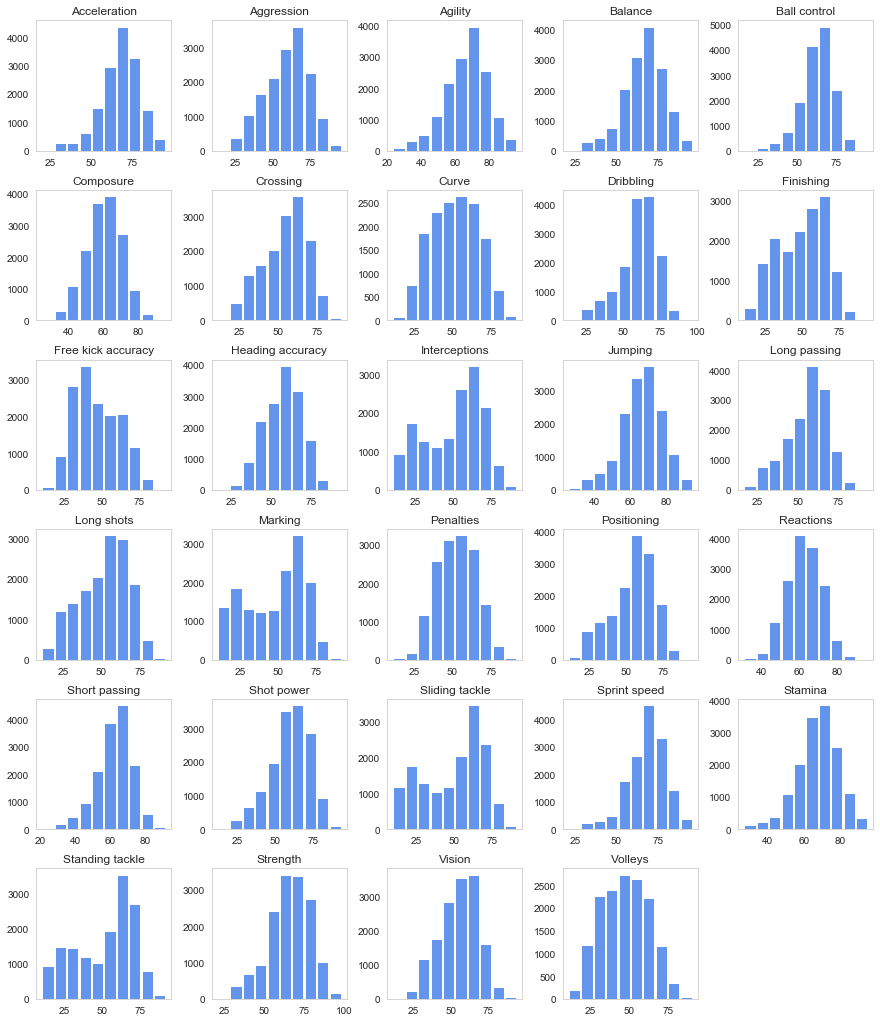

In [614]:
# Distribution of all numeric predictor variables
fifa18[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']].hist(grid = False, figsize = (15,18), layout = (6, 5), color = 'cornflowerblue', zorder = 2, rwidth = 0.9);

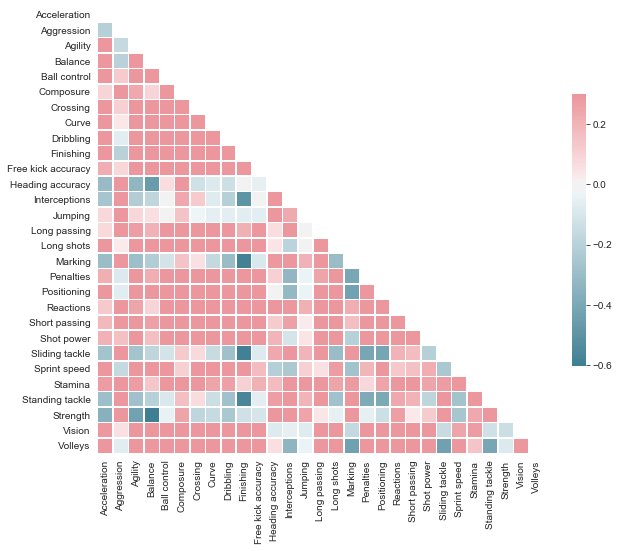

In [615]:
# Correlation matrix for numeric predictors
fifa18_corr = fifa18[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
                        'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
                        'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
                        'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
                        'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
                        'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(fifa18_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fifa18_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [626]:
# Creating predictor and target variables
fifa18_subset = fifa18[['Playing Position', 'Wage', 'Age', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
                        'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
                        'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
                        'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
                        'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
                        'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']]

fifa18_pred = pd.get_dummies(fifa18_subset, columns = ['Playing Position'], drop_first=True).drop(['Wage'], axis = 1)
fifa18_target = fifa18_subset[['Wage']]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fifa18_pred, fifa18_target, test_size = 0.3, random_state = 8908)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10603, 32) (10603, 1)
(4545, 32) (4545, 1)


In [617]:
# Linear Regression - all predictor variables

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

wage_lr_all = LinearRegression(fit_intercept = True)
wage_lr_all = wage_lr_all.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr_all = wage_lr_all.predict(X_test)

# The coefficients
# print('Coefficients: \n', wage_lr_all.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_lr_all))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_lr_all))

Mean squared error: 418756793.28
Coefficient of determination: 0.32


In [618]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,30)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 29
Score with 29 features: 0.396846


In [636]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

wage_rt = DecisionTreeRegressor()
wage_tree = wage_rt.fit(X_train, y_train)
wage_tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [637]:
print(wage_tree.score(X_train, y_train))
print(wage_tree.score(X_test, y_test))

0.9985703250905897
0.45197240168114555


In [638]:
from sklearn.ensemble import RandomForestRegressor

wage_rf = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1000,
                      verbose=0, warm_start=False)

In [639]:
# Make predictions using the testing set
wage_rf_pred = wage_rf.predict(X_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, wage_rf_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, wage_rf_pred))

Mean squared error: 193214051.44
Coefficient of determination: 0.69


In [641]:
# Get numerical feature importances
importance = list(wage_rf.feature_importances_)
# List of tuples with variable and importance
feature_importance_data = [(feature, importance) for feature, importance in zip(list(X_train.columns), importance)]
# Sort the feature importances by most important first
feature_importance_data = sorted(feature_importance_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_data];

Variable: Reactions            Importance: 0.4884334165748541
Variable: Ball control         Importance: 0.09751712137959587
Variable: Finishing            Importance: 0.06094041239257547
Variable: Standing tackle      Importance: 0.042122817676251416
Variable: Sliding tackle       Importance: 0.03392313453181015
Variable: Long shots           Importance: 0.018386897017754675
Variable: Marking              Importance: 0.01676543422595265
Variable: Positioning          Importance: 0.01671314227107603
Variable: Short passing        Importance: 0.016534247592376268
Variable: Interceptions        Importance: 0.016127324795228735
Variable: Free kick accuracy   Importance: 0.013700472647647682
Variable: Heading accuracy     Importance: 0.012932562348019597
Variable: Jumping              Importance: 0.012565267810792948
Variable: Long passing         Importance: 0.011389563292201987
Variable: Dribbling            Importance: 0.01104501938101302
Variable: Aggression           Importance: 0.010

In [635]:
# Defender wage analysis

fifa18_df = fifa18_subset.loc[fifa18_subset['Playing Position'] == 'DF'].reset_index()

fifa18_df_pred = fifa18_df.drop(['Playing Position', 'Wage', 'index'], axis = 1)
fifa18_df_target = fifa18_df[['Wage']]

# Splitting data into training and testing sets
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(fifa18_df_pred, fifa18_df_target, test_size = 0.3, random_state = 8908)

print(X_df_train.shape, y_df_train.shape)
print(X_df_test.shape, y_df_test.shape)

(3627, 30) (3627, 1)
(1555, 30) (1555, 1)


In [659]:
# Random Forest model for DF
wage_rf_df = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf_df.fit(X_df_train, y_df_train)

# Make predictions using the testing set
wage_rf_df_pred = wage_rf_df.predict(X_df_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_df_test, wage_rf_df_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_df_test, wage_rf_df_pred))

# Get numerical feature importances
importance_df = list(wage_rf_df.feature_importances_)
# List of tuples with variable and importance
feature_importance_df_data = [(feature, importance_df) for feature, importance_df in zip(list(X_df_train.columns), importance_df)]
# Sort the feature importances by most important first
feature_importance_df_data = sorted(feature_importance_df_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_df_data];

Mean squared error: 118966251.48
Coefficient of determination: 0.71
Variable: Standing tackle      Importance: 0.4168717998733599
Variable: Sliding tackle       Importance: 0.14737623780121728
Variable: Reactions            Importance: 0.04518640598607339
Variable: Composure            Importance: 0.040702681222811454
Variable: Short passing        Importance: 0.031970941482187126
Variable: Dribbling            Importance: 0.030467953082833836
Variable: Ball control         Importance: 0.02557875453967753
Variable: Interceptions        Importance: 0.02017212962352499
Variable: Jumping              Importance: 0.019404718407299338
Variable: Aggression           Importance: 0.015391059681139806
Variable: Curve                Importance: 0.015374869088895808
Variable: Agility              Importance: 0.013876508858930194
Variable: Heading accuracy     Importance: 0.013014188196803061
Variable: Marking              Importance: 0.01267433100392034
Variable: Free kick accuracy   Importance: 

In [664]:
# Midfielder wage analysis

fifa18_mf = fifa18_subset.loc[fifa18_subset['Playing Position'] == 'MF'].reset_index()

fifa18_mf_pred = fifa18_mf.drop(['Playing Position', 'Wage', 'index'], axis = 1)
fifa18_mf_target = fifa18_mf[['Wage']]

# Splitting data into training and testing sets
X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(fifa18_mf_pred, fifa18_mf_target, test_size = 0.3, random_state = 7999)

print(X_mf_train.shape, y_mf_train.shape)
print(X_mf_test.shape, y_mf_test.shape)

(4748, 30) (4748, 1)
(2036, 30) (2036, 1)


In [665]:
# Random Forest model for MF
wage_rf_mf = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf_mf.fit(X_mf_train, y_mf_train)

# Make predictions using the testing set
wage_rf_mf_pred = wage_rf_mf.predict(X_mf_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_mf_test, wage_rf_mf_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_mf_test, wage_rf_mf_pred))

# Get numerical feature importances
importance_mf = list(wage_rf_mf.feature_importances_)
# List of tuples with variable and importance
feature_importance_mf_data = [(feature, importance_mf) for feature, importance_mf in zip(list(X_mf_train.columns), importance_mf)]
# Sort the feature importances by most important first
feature_importance_mf_data = sorted(feature_importance_mf_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_mf_data];

Mean squared error: 168380434.25
Coefficient of determination: 0.67
Variable: Ball control         Importance: 0.34957899698787165
Variable: Short passing        Importance: 0.17848523838666605
Variable: Reactions            Importance: 0.07648854704557953
Variable: Positioning          Importance: 0.04850210498901963
Variable: Vision               Importance: 0.03085354365386022
Variable: Sliding tackle       Importance: 0.028300888219044525
Variable: Interceptions        Importance: 0.02401399199917252
Variable: Dribbling            Importance: 0.019686126029752612
Variable: Standing tackle      Importance: 0.017912831366371576
Variable: Marking              Importance: 0.017203738779781094
Variable: Shot power           Importance: 0.017186294468752916
Variable: Heading accuracy     Importance: 0.013565874295170173
Variable: Jumping              Importance: 0.012538637568646814
Variable: Volleys              Importance: 0.012314567852267429
Variable: Composure            Importance:

In [674]:
# Attacker wage analysis

fifa18_at = fifa18_subset.loc[fifa18_subset['Playing Position'] == 'AT'].reset_index()

fifa18_at_pred = fifa18_at.drop(['Playing Position', 'Wage', 'index'], axis = 1)
fifa18_at_target = fifa18_at[['Wage']]

# Splitting data into training and testing sets
X_at_train, X_at_test, y_at_train, y_at_test = train_test_split(fifa18_at_pred, fifa18_at_target, test_size = 0.3, random_state = 9018)

print(X_at_train.shape, y_at_train.shape)
print(X_at_test.shape, y_at_test.shape)

(2227, 30) (2227, 1)
(955, 30) (955, 1)


In [675]:
# Random Forest model for AT
wage_rf_at = RandomForestRegressor(random_state = 1000)

# Train the model using the training sets
wage_rf_at.fit(X_at_train, y_at_train)

# Make predictions using the testing set
wage_rf_at_pred = wage_rf_at.predict(X_at_test);

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_at_test, wage_rf_at_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_at_test, wage_rf_at_pred))

# Get numerical feature importances
importance_at = list(wage_rf_at.feature_importances_)
# List of tuples with variable and importance
feature_importance_at_data = [(feature, importance_at) for feature, importance_at in zip(list(X_at_train.columns), importance_at)]
# Sort the feature importances by most important first
feature_importance_at_data = sorted(feature_importance_at_data, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance_at_data];

Mean squared error: 378791382.85
Coefficient of determination: 0.71
Variable: Reactions            Importance: 0.2595148560898671
Variable: Positioning          Importance: 0.16026863879364636
Variable: Finishing            Importance: 0.15316744708861713
Variable: Ball control         Importance: 0.11048643737120123
Variable: Shot power           Importance: 0.04080588953664394
Variable: Long shots           Importance: 0.03372654052696259
Variable: Vision               Importance: 0.028579772867740397
Variable: Short passing        Importance: 0.02202920282108918
Variable: Free kick accuracy   Importance: 0.021918530352597745
Variable: Dribbling            Importance: 0.017360683968335597
Variable: Acceleration         Importance: 0.014353213393372057
Variable: Sliding tackle       Importance: 0.01344925996367819
Variable: Sprint speed         Importance: 0.011505065634684404
Variable: Curve                Importance: 0.010210482659156405
Variable: Jumping              Importance: 0.

In [678]:
# Top 5 features for Wages by position
top_5_features = pd.DataFrame({'Defenders' : ['Standing tackle', 'Sliding tackle', 'Reactions', 'Composure', 'Short passing'],
                              'Midfielders' : ['Ball control', 'Short passing', 'Reactions', 'Positioning', 'Vision'],
                              'Attackers' : ['Reactions', 'Positioning', 'Finishing', 'Ball Control', 'Shot power']})
top_5_features

,Defenders,Midfielders,Attackers
0,Standing tackle,Ball control,Reactions
1,Sliding tackle,Short passing,Positioning
2,Reactions,Reactions,Finishing
3,Composure,Positioning,Ball Control
4,Short passing,Vision,Shot power
